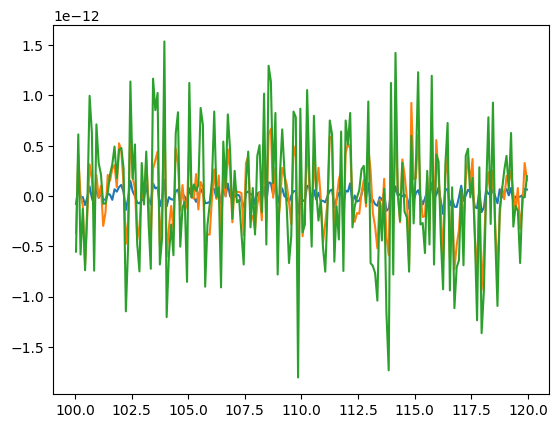

In [25]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

def get_mock_fn(kind='power'):
    base_dir = Path('_tests')
    return base_dir / '{}.npy'.format(kind)

from pypower import PowerSpectrumMultipoles
pypower = PowerSpectrumMultipoles.load(get_mock_fn('pypower_0'))
sep = pypower.sep_direct
ref = pypower.corr_direct_nonorm
test = -np.load(get_mock_fn('thetacut_0'))
mask = (sep > 100.) & (sep < 120.)
ax = plt.gca()
for ill, ell in enumerate([0, 2, 4]):
    color = 'C{:d}'.format(ill)
    label = '{:d}'.format(ell)
    tmp_test = test.T[ill][mask]
    tmp_ref = ref[ill][mask]
    #ax.plot(sep[mask], tmp_ref, label=label, color=color, linestyle='-')
    #ax.plot(sep[mask], tmp_test, color=color, linestyle='--')
    diff = tmp_test - tmp_ref
    ax.plot(sep[mask], diff, label=label, color=color, linestyle='-')
#ax.set_xscale('log')
#ax.set_xlim(0., 2000.)
#ax.set_xlim(50., 51.)
plt.show()

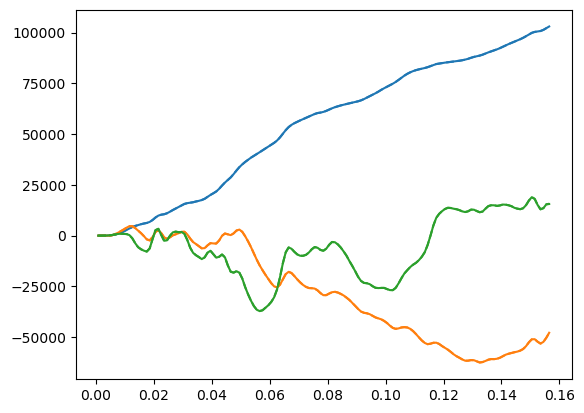

In [5]:
from pathlib import Path
from matplotlib import pyplot as plt

def get_mock_fn(kind='power'):
    base_dir = Path('_tests')
    return base_dir / '{}.npy'.format(kind)


from jaxpower import PowerSpectrumMultipoles
jaxpower = PowerSpectrumMultipoles.load(get_mock_fn('jaxpower_0')).clone(norm=1.)
from pypower import PowerSpectrumMultipoles
pypower = PowerSpectrumMultipoles.load(get_mock_fn('pypower_0'))

ax = plt.gca()
for ill, ell in enumerate([0, 2, 4]):
    color = 'C{:d}'.format(ill)
    k = jaxpower.x(projs=ell)
    ax.plot(k, k * jaxpower.view(projs=ell), color=color, linestyle='-')
    ax.plot(pypower.k, pypower.k * pypower(ell=ell), color=color, linestyle='--')
plt.show()

On top of each other, all good!